# What exactly is a variable?

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

A variable is any characteristic, number, or quantity that can be measured or counted. They are called "variables" because the values they take vary. The following are examples of variables:

- Age (21, 35, 62, ...)

- Gender (male, female)

- Income (GBP 20000, GBP 35000, GBP 45000, ...)

- House price (GBP 350000, GBP 570000, ...)

- Country of birth (China, Russia, Costa Rica, etc.)

- Eye colour (brown, green, blue, ...)

- Vehicle make (Ford, Volkswagen, ...)

Most variables in a data set can be classified into one of two major types:

- **Numerical variables** 
- **Categorical variables**

===================================================================================

## Numerical variables

The values of a numerical variable are numbers. They can be further classified into:

- **Discrete variables** 
- **Continuous variables**


### Discrete variables

In a discrete variable, the values are whole numbers (counts). For example, the number of items bought by a customer in a supermarket is discrete. The customer can purchase one, twenty-five, or fifty items, but not 3.7 items. It is always a round number. The following are examples of discrete variables:

- Number of active bank accounts of a borrower (1, 4, 7, ...)

- Number of pets in the family

- Number of children in the family


### Continuous variables

A variable that may contain any value within a range is continuous. For example, the total amount paid by a customer in a supermarket is continuous. The customer can pay GBP 20.5, GBP 13.10, GBP 83.20, and so on. Other examples of continuous variables are:

- House price (in principle, it can take any value) (GBP 350000, 57000, 100000, ...)

- Time spent surfing a website (3.4 seconds, 5.10 seconds, ...)

- Total debt as a percentage of total income (0.2, 0.001, 0, 0.75, ...)

=============================================================================

## In this demo: Peer-to-peer lending (Finance)

In this demo, we will use a toy data set that simulates data from a peer-to-peer finance company.

To obtain the data, go to the lecture **Download datasets** in **Section 2**. This is a toy dataset that I created and comes within the Datasets.zip file that you can find in this lecture. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's load the dataset.

# Variable definitions:
#----------------------
# disbursed_amount: loan amount given to the borrower.
# interest: interest rate.
# income: annual income.
# number_open_accounts: open accounts (more on this later).
# number_credit_lines_12: accounts opened in the last 12 months.
# target: loan status(paid or being repaid = 1, defaulted = 0).


data = pd.read_csv('../Datasets/loan.csv')

data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


## Continuous variables

In [3]:
# Let's look at the values of the variable disbursed_amount.
# This is the amount of money requested by the borrower.

# This variable is continuous: it can take, in principle,
# any value.

data['disbursed_amount'].unique()

array([23201.5 ,  7425.  , 11150.  , ...,  6279.  , 12894.75, 25584.  ])

In [5]:
data['disbursed_amount'].describe()

count    10000.000000
mean     14132.275500
std       8058.310311
min        910.000000
25%       7840.000000
50%      12375.000000
75%      19200.000000
max      35000.000000
Name: disbursed_amount, dtype: float64

Text(0, 0.5, 'Number of loans')

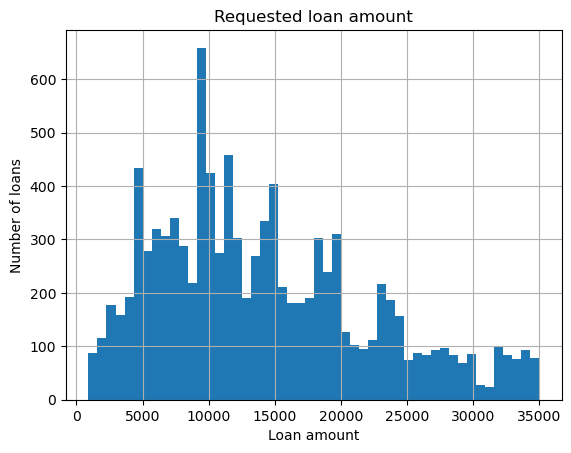

In [8]:
# Let's make a histogram to get familiar with the
# variable distribution.

fig = data['disbursed_amount'].hist(bins=50)

fig.set_title('Requested loan amount')
fig.set_xlabel('Loan amount')
fig.set_ylabel('Number of loans')

The variable's values vary across the entire value range. This is characteristic of continuous variables.

In [9]:
# Let's examine variable interest rate,
# which is the interest charged by the finance
# company to the borrowers.

# This variable is also continuous: it can take, in principle,
# any value within the range.

data['interest'].unique()

array([15.484 , 11.2032,  8.51  , ..., 12.9195, 11.2332, 11.0019],
      shape=(1868,))

Text(0, 0.5, 'Number of Loans')

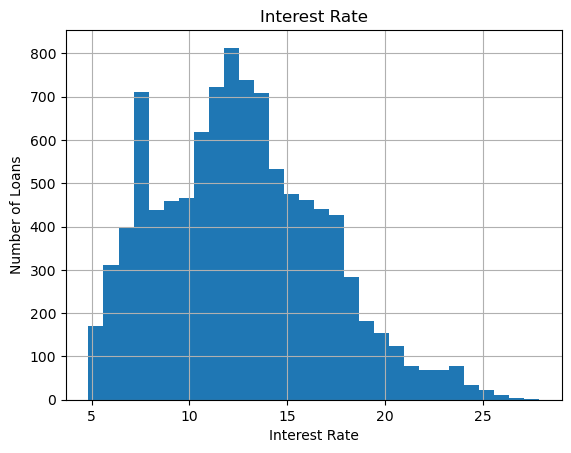

In [10]:
# Let's make a histogram to get familiar with the
# variable distribution.

fig = data['interest'].hist(bins=30)

fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans')

The variable's values vary continuously across the entire value range. The values are the interest rates charged to borrowers.

Text(0, 0.5, 'Number of Customers')

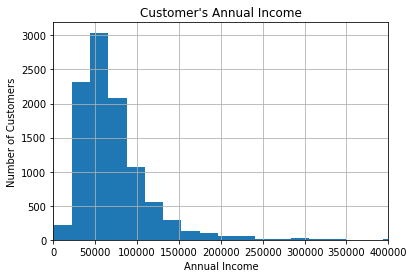

In [7]:
# Now, let's explore the income declared by the customers,
# that is, how much they earn yearly.

# This variable is also continuous.

fig = data['income'].hist(bins=100)

# For better visualisation, I display a specific
# range in the x-axis.

fig.set_xlim(0, 400000)

# title and axis legends
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

Only a few consumers earn greater salaries, with the majority of salaries falling between USD 30 and USD 70,000.
Because this is a continuous variable, the variable's values vary continuously across the variable range.

## Discrete variables

Let's explore the variable "Number of open credit lines in the borrower's credit file" ("number_open_accounts" in the dataset). 

This variable represents the borrower's total number of credit items (for example, credit cards, car loans, mortgages, etc.). 

By definition, it is a discrete variable, because a borrower can have 1 credit card, but not 3.5 credit cards.

In [11]:
# Let's inspect the values of the variable.

# This is a discrete variable.

data['number_open_accounts'].dropna().unique()

array([ 4., 13.,  8., 20., 14.,  5.,  9., 18., 16., 17., 12., 15.,  6.,
       10., 11.,  7., 21., 19., 26.,  2., 22., 27., 23., 25., 24., 28.,
        3., 30., 41., 32., 33., 31., 29., 37., 49., 34., 35., 38.,  1.,
       36., 42., 47., 40., 44., 43.])

Text(0, 0.5, 'Number of Customers')

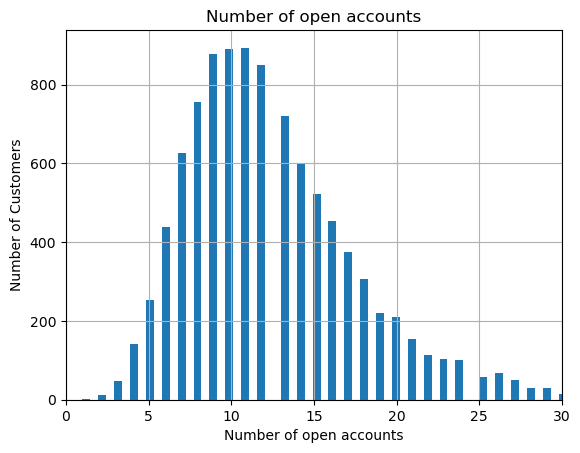

In [12]:
# Let's make an histogram to get familiar with the
# variable distribution.

fig = data['number_open_accounts'].hist(bins=100)

# For better visualisation, I display a specific
# value range in the x-axis.
fig.set_xlim(0, 30)

# Title and axis labels.
fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers')

Because not all of the values within the variable range are present in the variable, histograms of discrete variables show this typical broken form.

Let's look at another example of a discrete variable in this dataset: **Number of installment accounts opened in the previous 12 months** (in the dataset, 'number_credit_lines_12').

Installment accounts are ones that have a defined length and quantity of repayments agreed upon between the lender and the borrower at the time of acquisition. A car loan or a student loan are two examples of this. The borrower understands that they will pay a set amount over a set length of time, such as 36 months.

In [13]:
# Let's inspect the variable values.

data['number_credit_lines_12'].unique()

array([nan,  2.,  4.,  1.,  0.,  3.,  5.,  6.])

Text(0, 0.5, 'Number of Borrowers')

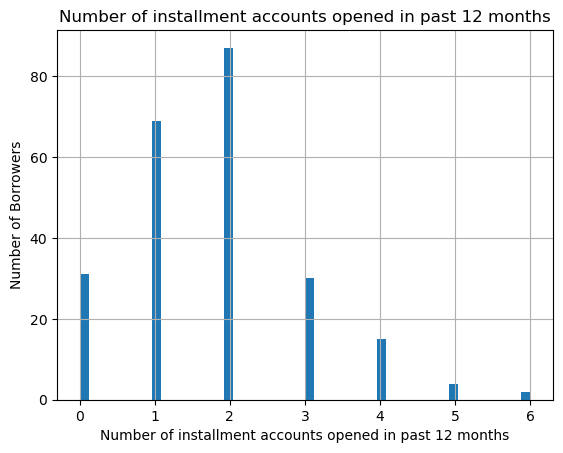

In [14]:
# Let's make a histogram to get familiar with the
# variable distribution.

fig = data['number_credit_lines_12'].hist(bins=50)
fig.set_title('Number of installment accounts opened in past 12 months')
fig.set_xlabel('Number of installment accounts opened in past 12 months')
fig.set_ylabel('Number of Borrowers')

Only a few borrowers have more than two installment accounts.

## Binary variables

Binary variables are discrete variables with only two possible values, hence the name.

In [12]:
# A binary variable, can take 2 values. For example in
# the variable "target", either the loan is 
# defaulted (1) or not (0).

data['target'].unique()

array([0, 1], dtype=int64)

Text(0, 0.5, 'Number of Loans')

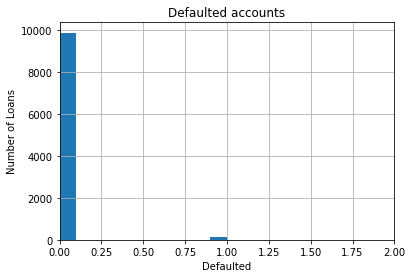

In [13]:
# Let's make a histogram, although histograms for
# binary variables do not make a lot of sense.

fig = data['target'].hist()
fig.set_xlim(0, 2)
fig.set_title('Defaulted accounts')
fig.set_xlabel('Defaulted')
fig.set_ylabel('Number of Loans')

As we can see, the variable shows only 2 values, 0 and 1, and the majority of the loans have not been defaulted.

**That is all for this demonstration. I hope you enjoyed the notebook, and I'll see you in the next one.**